## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
df.shape

(10886, 11)

In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


''

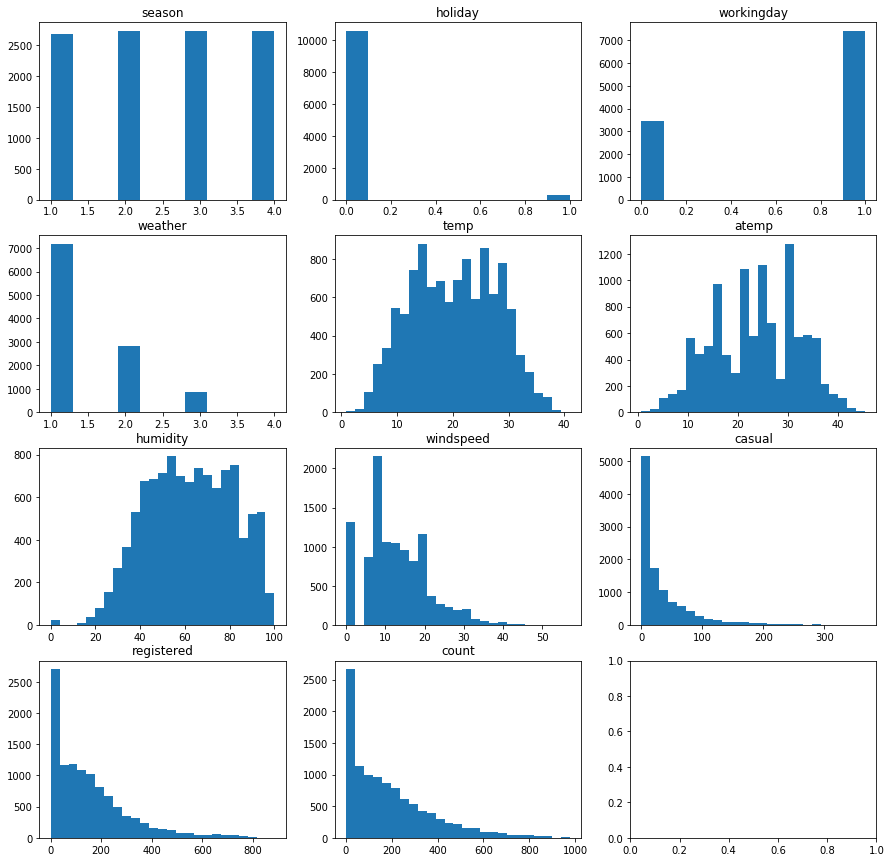

In [13]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12]] = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
ax1.hist(df['season'].values)
ax1.set_title('season')
ax2.hist(df['holiday'].values)
ax2.set_title('holiday')
ax3.hist(df['workingday'].values)
ax3.set_title('workingday')
ax4.hist(df['weather'].values)
ax4.set_title('weather')
ax5.hist(df['temp'].values, bins = 25)
ax5.set_title('temp')
ax6.hist(df['atemp'].values, bins = 25)
ax6.set_title('atemp')
ax7.hist(df['humidity'].values, bins = 25)
ax7.set_title('humidity')
ax8.hist(df['windspeed'].values, bins = 25)
ax8.set_title('windspeed')
ax9.hist(df['casual'].values, bins = 25)
ax9.set_title('casual')
ax10.hist(df['registered'].values, bins = 25)
ax10.set_title('registered')
ax11.hist(df['count'].values, bins = 25)
ax11.set_title('count')
;

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [15]:
x_num = df.shape[0] - 1

In [16]:
# Среднее значение
mean_season = df['season'].mean()
mean_holiday = df['holiday'].mean()
mean_workingday = df['workingday'].mean()
mean_weather = df['weather'].mean()
mean_temp = df['temp'].mean()
mean_atemp = df['atemp'].mean()
mean_humidity = df['humidity'].mean()
mean_windspeed = df['windspeed'].mean()
mean_casual = df['casual'].mean()
mean_registered = df['registered'].mean()
mean_count = df['count'].mean()
print('Среднее для season =', mean_season)
print('Среднее для holiday =', mean_holiday)
print('Среднее для workingday =', mean_workingday)
print('Среднее для weather =', mean_weather)
print('Среднее для temp =', mean_temp)
print('Среднее для atemp =', mean_atemp)
print('Среднее для humidity =', mean_humidity)
print('Среднее для windspeed =', mean_windspeed)
print('Среднее для casual =', mean_casual)
print('Среднее для registered =', mean_registered)
print('Среднее для count =', mean_count)

Среднее для season = 2.5066139996325556
Среднее для holiday = 0.02856880396839978
Среднее для workingday = 0.6808745177291935
Среднее для weather = 1.418427337865148
Среднее для temp = 20.230859819952173
Среднее для atemp = 23.65508405291192
Среднее для humidity = 61.88645967297446
Среднее для windspeed = 12.799395406945093
Среднее для casual = 36.02195480433584
Среднее для registered = 155.5521771082124
Среднее для count = 191.57413191254824


In [17]:
# Дисперсия

disp_season = df['season'].apply(lambda x: ((x - mean_season)**2)).sum() / x_num
disp_holiday = df['holiday'].apply(lambda x: ((x - mean_holiday)**2)).sum() / x_num
disp_workingday = df['workingday'].apply(lambda x: ((x - mean_workingday)**2)).sum() / x_num
disp_weather = df['weather'].apply(lambda x: ((x - mean_weather)**2)).sum() / x_num
disp_temp = df['temp'].apply(lambda x: ((x - mean_temp)**2)).sum() / x_num
disp_atemp = df['atemp'].apply(lambda x: ((x - mean_atemp)**2)).sum() / x_num
disp_humidity = df['humidity'].apply(lambda x: ((x - mean_humidity)**2)).sum() / x_num
disp_windspeed = df['windspeed'].apply(lambda x: ((x - mean_windspeed)**2)).sum() / x_num
disp_casual = df['casual'].apply(lambda x: ((x - mean_casual)**2)).sum() / x_num
disp_registered = df['registered'].apply(lambda x: ((x - mean_registered)**2)).sum() / x_num
disp_count = df['count'].apply(lambda x: ((x - mean_count)**2)).sum() / x_num
print('Дисперсия для season =', disp_season)
print('Дисперсия для holiday =', disp_holiday)
print('Дисперсия для workingday =', disp_workingday)
print('Дисперсия для weather =', disp_weather)
print('Дисперсия для temp =', disp_temp)
print('Дисперсия для atemp =', disp_atemp)
print('Дисперсия для humidity =', disp_humidity)
print('Дисперсия для windspeed =', disp_windspeed)
print('Дисперсия для casual =', disp_casual)
print('Дисперсия для registered =', disp_registered)
print('Дисперсия для count =', disp_count)

Дисперсия для season = 1.2458450888402808
Дисперсия для holiday = 0.0277551770294743
Дисперсия для workingday = 0.21730437065606042
Дисперсия для weather = 0.4017513528731512
Дисперсия для temp = 60.708872296930195
Дисперсия для atemp = 71.81885577841906
Дисперсия для humidity = 370.371305848029
Дисперсия для windspeed = 66.65966976134224
Дисперсия для casual = 2496.049219366262
Дисперсия для registered = 22812.789514322696
Дисперсия для count = 32813.31315347236


In [18]:
df['season'].var()

1.2458450888401458

In [19]:
# 50 процентиль

df.quantile()

season          3.000
holiday         0.000
workingday      1.000
weather         1.000
temp           20.500
atemp          24.240
humidity       62.000
windspeed      12.998
casual         17.000
registered    118.000
count         145.000
Name: 0.5, dtype: float64

In [20]:
# 75 процентиль

df.quantile(0.75)

season          4.0000
holiday         0.0000
workingday      1.0000
weather         2.0000
temp           26.2400
atemp          31.0600
humidity       77.0000
windspeed      16.9979
casual         49.0000
registered    222.0000
count         284.0000
Name: 0.75, dtype: float64

In [21]:
# 99 процентиль

df.quantile(0.99)

season          4.0000
holiday         1.0000
workingday      1.0000
weather         3.0000
temp           36.0800
atemp          40.1500
humidity      100.0000
windspeed      35.0008
casual        240.1500
registered    697.0000
count         774.1500
Name: 0.99, dtype: float64

In [22]:
# Моды

df.mode()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,4,0,1,1,14.76,31.06,88,0.0,0,3,5


При анализе данных, были выявленны следующие аномалии:
1. Высокая дисперсия у следующих колонках: temp, atemp, humidity, windspeed.
2. Очень выская дисперсия > 1000: casual, registered, count
3. Высокое относительное отклонение среднего от медианы: workingday, weather, registered, count, casual


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [25]:
# Эксцесс
df.kurtosis()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [26]:
# Ассиметрия
df.skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [27]:
# Самый высокий показатель дисперсии у метрики count
stats.norm.interval(0.95, loc = df['count'].mean(), scale = df['count'].std())

(-163.46247359398893, 546.6107374190854)

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [28]:
print('Аномалий в season: ', df[(df['season'] > (3*np.sqrt(disp_season) + mean_season)) | (df['season'] < (3*np.sqrt(disp_season) - mean_season))].shape[0])
print('Аномалий в holiday: ', df[(df['holiday'] > (3*np.sqrt(disp_holiday) + mean_holiday)) | (df['holiday'] < (3*np.sqrt(disp_holiday) - mean_holiday))].shape[0])
print('Аномалий в workingday: ', df[(df['workingday'] > (3*np.sqrt(disp_workingday) + mean_workingday)) | (df['workingday'] < (3*np.sqrt(disp_workingday) - mean_workingday))].shape[0])
print('Аномалий в weather: ', df[(df['weather'] > (3*np.sqrt(disp_weather) + mean_weather)) | (df['weather'] < (3*np.sqrt(disp_weather) - mean_weather))].shape[0])
print('Аномалий в temp: ', df[(df['temp'] > (3*np.sqrt(disp_temp) + mean_temp)) | (df['temp'] < (3*np.sqrt(disp_temp) - mean_temp))].shape[0])
print('Аномалий в atemp: ', df[(df['atemp'] > (3*np.sqrt(disp_atemp) + mean_atemp)) | (df['atemp'] < (3*np.sqrt(disp_atemp) - mean_atemp))].shape[0])
print('Аномалий в humidity: ', df[(df['humidity'] > (3*np.sqrt(disp_humidity) + mean_humidity)) | (df['humidity'] < (3*np.sqrt(disp_humidity) - mean_humidity))].shape[0])
print('Аномалий в windspeed: ', df[(df['windspeed'] > (3*np.sqrt(disp_windspeed) + mean_windspeed)) | (df['windspeed'] < (3*np.sqrt(disp_windspeed) - mean_windspeed))].shape[0])
print('Аномалий в casual: ', df[(df['casual'] > (3*np.sqrt(disp_casual) + mean_casual)) | (df['casual'] < (3*np.sqrt(disp_casual) - mean_casual))].shape[0])
print('Аномалий в registered: ', df[(df['registered'] > (3*np.sqrt(disp_registered) + mean_registered)) | (df['registered'] < (3*np.sqrt(disp_registered) - mean_registered))].shape[0])
print('Аномалий в count: ', df[(df['count'] > (3*np.sqrt(disp_count) + mean_count)) | (df['count'] < (3*np.sqrt(disp_count) - mean_count))].shape[0])

Аномалий в season:  0
Аномалий в holiday:  10886
Аномалий в workingday:  3474
Аномалий в weather:  1
Аномалий в temp:  14
Аномалий в atemp:  3
Аномалий в humidity:  0
Аномалий в windspeed:  5463
Аномалий в casual:  10399
Аномалий в registered:  9518
Аномалий в count:  9118


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [29]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


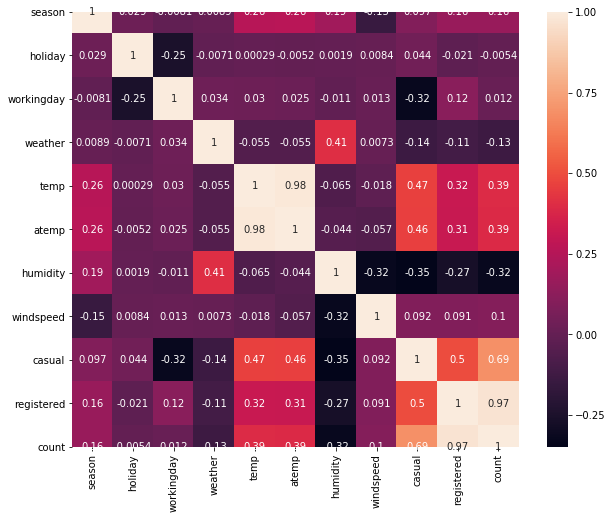

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

In [33]:
df.corr()[df.corr() > 0.5]
# Параметры temp и atemp, registered и count, casual и count коррелируют с коэффициентом > 0.5
# При этом temp и atemp, registered и count имеют корреляцию > 0.9

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,1.000000,0.984948,NaN,NaN,NaN,NaN,NaN
atemp,NaN,NaN,NaN,NaN,0.984948,1.000000,NaN,NaN,NaN,NaN,NaN
humidity,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
windspeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.690414
registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.970948
